In [1]:
%load_ext autoreload
%autoreload 2

from pydrake.geometry import StartMeshcat

from iiwa_batter.sandbox.hydroelastic_tuning import run_hydroelastic_tuning
from iiwa_batter.assets.make_assets import write_assets

In [2]:
meshcat = StartMeshcat()

INFO:drake:Meshcat listening for connections at http://localhost:7000


In [3]:
import numpy as np

bat_modulus = 1.2e12
ball_modulus = 6e9
mu_dynamic = 0.5
rigid_bat = False
dt = 2e-5
write_assets(bat_modulus, ball_modulus, 1e-3, 1e-3, mu_dynamic, 0.014, rigid_bat)

#velocities = np.linspace(20, 60, 9)
velocities = np.linspace(10, 110, 21)

velocity_results = {}
for velocity in velocities:
    cor, ball_x_positions, ball_x_velocities, times = run_hydroelastic_tuning(meshcat, [1, 0, 0], -1*velocity, dt=dt, record_time=0.2, debug_plot=False)
    velocity_results[velocity] = {
        "cor": cor,
        "ball_x_positions": ball_x_positions,
        "ball_x_velocities": ball_x_velocities,
        "times": times,
    }


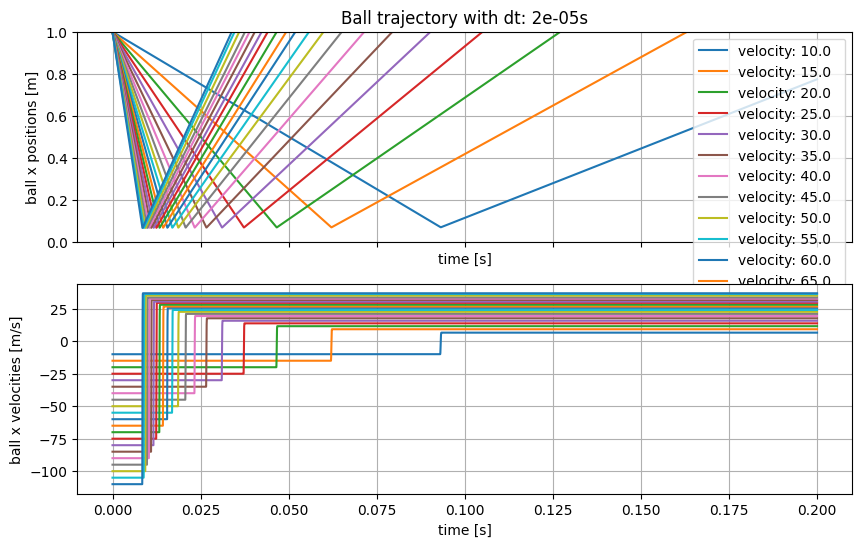

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

for velocity, result in velocity_results.items():
    ball_x_positions = result["ball_x_positions"]
    ball_x_velocities = result["ball_x_velocities"]
    times = result["times"]
    axes[0].plot(times, ball_x_positions, label=f"velocity: {velocity}")
    axes[1].plot(times, ball_x_velocities, label=f"velocity: {velocity}")

axes[0].set_ylabel("ball x positions [m]")
axes[0].set_xlabel("time [s]")
axes[0].grid(True)
axes[0].set_ylim([0, 1])
axes[1].set_ylabel("ball x velocities [m/s]")
axes[1].set_xlabel("time [s]")
axes[1].grid(True)

axes[0].legend()

axes[0].set_title(f"Ball trajectory with dt: {dt:.0e}s")

fig.savefig(f"notebook_images/hydroelastic_tuning/ball_trajectory_hydroelastic_tuning_dt_{dt:.0e}.png")


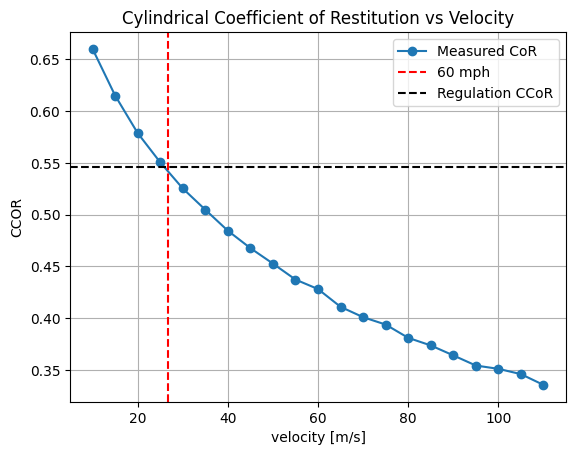

In [5]:
# Plot the coefficient of restitution for each velocity
velocities = np.array(list(velocity_results.keys()))
cors = np.array([result["cor"] for result in velocity_results.values()])

fig, ax = plt.subplots()
ax.plot(velocities, cors, marker="o", label="Measured CoR")
ax.set_xlabel("velocity [m/s]")
ax.set_ylabel("CCOR")
ax.grid(True)
# Put a vertical line at 26.8224 m/s
ax.axvline(26.8224, color="red", linestyle="--", label="60 mph")
# Put a horizontal line at 0.546
ax.axhline(0.546, color="black", linestyle="--", label="Regulation CCoR")
ax.set_title("Cylindrical Coefficient of Restitution vs Velocity")
ax.legend()

fig.savefig(f"notebook_images/hydroelastic_tuning/ccor_vs_velocity_hydroelastic_tuning_dt_{dt:.0e}.png")